# 跌停比-DCP——Distribution

<b>研究目的：</b>  
观察PB分位数与时间轴的连续性


<b>研究内容：</b> 
画出跌停比随时间分布图

# 1 数据准备

## 1.1 日期列表获取以及数据获取

In [9]:
#coding: utf-8

# 导入库
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from jqdata import *
# 设置起始时间和股票池
begin = "2019-01-01"
end = "2019-01-01"
#["000001.SZ","000002.SZ","000003.SZ","000005.SZ","000006.SZ","000007.SZ","000008.SZ","000009.SZ","000010.SZ"]
Tdays = get_trade_days(begin,end)
Qt = ['DCP','A_stock_index'] #跌停比 Drop Down Propotion
Quantiles = pd.DataFrame(index =  Tdays, columns = Qt)
#print(Tdays)
A_stock_index_data = get_price(security='000001.XSHG', start_date=begin, end_date=end, frequency='daily', fields=["close"], skip_paused=True, fq='pre')/100
#print A_stock_index_data.index,A_stock_index_data.head()
#
def get_DCP_date_distribution(end_date='2019-01-01',count=255,days=None):
    print 'entering get_DCP_date_distribution',end_date,count,type(days)
    trader_dates = get_trade_days(end_date=end_date,count=count)
    if not days is None:trader_dates=days
    pct_list = []#需要空仓的时间列表
    count_drop_down=0;down_thresh=-9.85
    for yesterday in trader_dates:
        # 计算昨天市场上跌停的股票占比propotion
        count_drop_down=0
        stock_list = list(get_all_securities('stock', yesterday).index)
        #print yesterday,len(stock_list)
        pct_all =get_price(security = stock_list,end_date=yesterday,fields=['pre_close','close'], count=1, frequency='daily', skip_paused=False,fq='pre')
        percent_yesterday_df = (pct_all['close']-pct_all['pre_close'])/pct_all['pre_close']
        percent_list = (percent_yesterday_df.iloc[0]*100).tolist()
        for item in percent_list:
            if item<=down_thresh: count_drop_down+=1
        propotion = count_drop_down*1.0000/len(stock_list)*100
        Quantiles.ix[yesterday,Qt[0] ] = propotion;Quantiles.ix[yesterday,Qt[1]]=A_stock_index_data.loc[yesterday]['close']
        #print Quantiles.loc[yesterday]
    return Quantiles
write_file('DCP_A_stock_index_data.csv', get_DCP_date_distribution(days=Tdays).to_csv(), append=False) #写到文件中
print Quantiles[Qt].head()

entering get_DCP_date_distribution 2019-01-01 255 <type 'numpy.ndarray'>
                   DCP A_stock_index
2007-01-04   0.2124646       27.1572
2007-01-05   0.2124646       26.4133
2007-01-08  0.07082153        27.072
2007-01-09           0        28.078
2007-01-10           0       28.2558


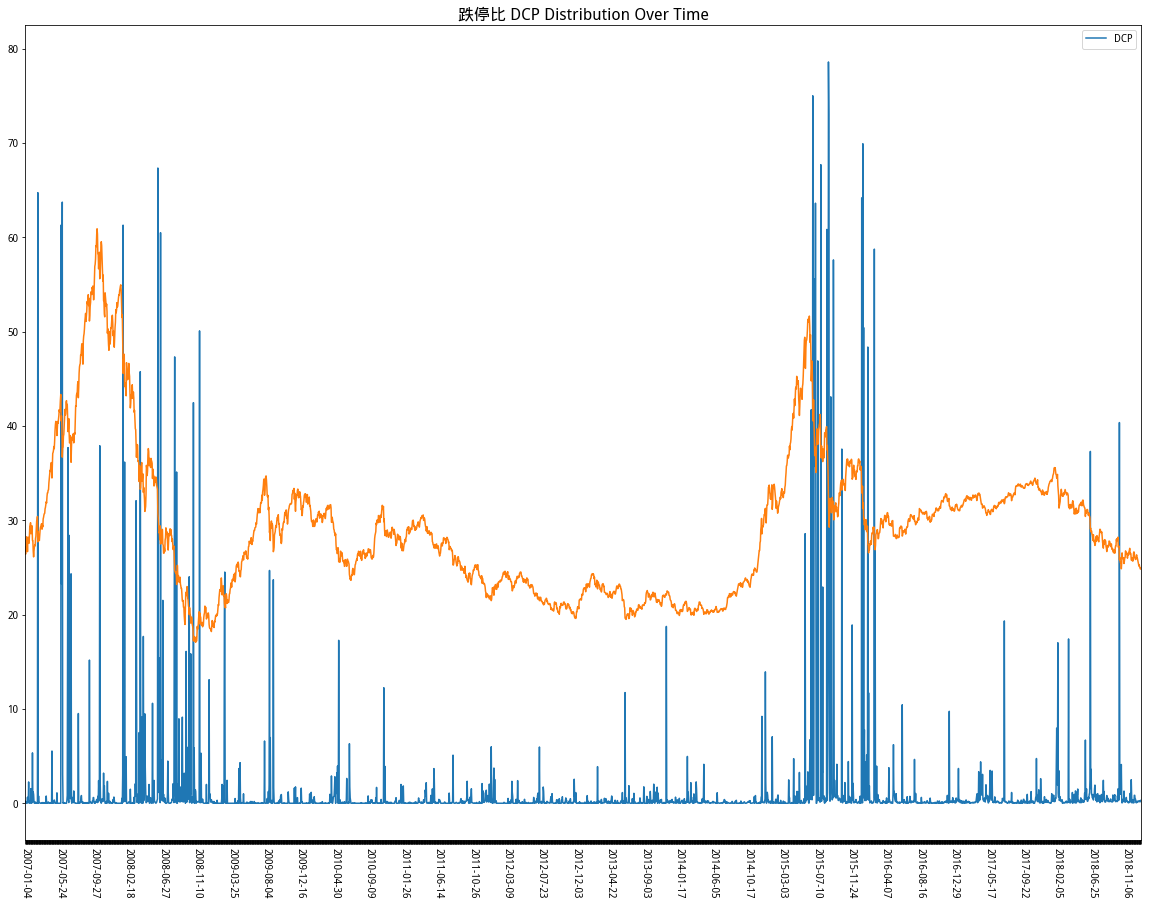

In [10]:
plt.figure(figsize=(20,15))
# print(Quantiles.iloc[:,0])
p1 = plt.plot(range(len(Quantiles.index)),Quantiles.iloc[:,0])

p2 = plt.plot(range(len(Quantiles.index)),Quantiles.iloc[:,1])
'''
p3 = plt.plot(range(len(Quantiles.index)),Quantiles.iloc[:,2]
'''
plt.title("跌停比 DCP Distribution Over Time", fontsize=16)
x_tick = [] 
for i in range(len(Quantiles.index)): 
    if i%90 == 0:
        x_tick.append(Quantiles.index[i])
    else: x_tick.append("") 
plt.legend(['DCP'])
plt.xticks(range(len(x_tick)), x_tick,rotation = -90)
plt.xlim(0,len(x_tick))
plt.show()
